In [4]:
pip install Biopython

     ---------------------------------------- 2.7/2.7 MB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Load Libraries
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
## 1 ##
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.

def get_sequences_from_file(fasta_fn): # Takes the FASTA file path as an input
    sequence_data_dict = {} # Creates an empty dictionary to add values to in the loop below
    for record in SeqIO.parse(fasta_fn, "fasta"): # Here it goes through each record in FASTA file 
        description = record.description.split() # Splits the records to assign each part to species name or sequence 
        species_name = description[1] + " " + description[2] # Extracts the description and species name
        sequence_data_dict[species_name] = record.seq # Extracts the sequence
    return(sequence_data_dict) # Returns a dictionary where the species_name is the key and the record.seq is the value

In [3]:
# Checking the function above
fasta = get_sequences_from_file("penguins_cytb.fasta")
# Here is what the output looks like
fasta

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

In [4]:
CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]

NCBICodonTableDNA(id=2, names=['Vertebrate Mitochondrial', 'SGC1'], ...)

In [5]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names

def translate_function(string_nucleotides):
    # Get the codon table for Vertebrate Mitochondrial from Biopython
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""  # An empty string to add values to in the loop below
    
    for i in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[i:i+3]  # Extract the codon (3 Values like XXX)
        # Check if the codon is a stop codon, If it is a stop codon the loop will break 
        if codon in mito_table.stop_codons:
            break 
        # If it is not a stop codon we will continue as below
        # Translate the codons
        aminoacid = mito_table.forward_table[codon]
        # Add the amino acid to aa_seq_string empty string
        aa_seq_string += aminoacid
    return aa_seq_string

In [6]:
# Checking the function above
for seq in fasta.values(): # .values to extract the sequence
    print("---Here is your translation!: ", translate_function(seq))

---Here is your translation!:  MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH
---Here is your translation!:  MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH
---Here is your translation!:  MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGAT

In [7]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

def translate_function_alternative(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    sequence = Seq(string_nucleotides)
    aa_seq_second = sequence.translate(table=mito_table, to_stop=True) # Translation
    return aa_seq_second

In [8]:
# Checking the function above
for seq in fasta.values():
    print("---Here is your translation!: ", translate_function_alternative(seq))

---Here is your translation!:  MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH
---Here is your translation!:  MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH
---Here is your translation!:  MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGAT

In [9]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight

def compute_molecular_weight(aa_seq):
    # ProteinAnalysis object 
    proteinAna = ProteinAnalysis(aa_seq)
    # Calculate the molecular weight 
    mw = proteinAna.molecular_weight()
    return mw

In [10]:
# Checking the function above # First we need to use the translate_function function to get the amino acids and then use above.
for sequence in fasta.values():
        print("The Molecular Weight of the amino acid is: ", compute_molecular_weight(translate_function(sequence)))

The Molecular Weight of the amino acid is:  42459.602100000004
The Molecular Weight of the amino acid is:  42563.70669999999
The Molecular Weight of the amino acid is:  42475.5753
The Molecular Weight of the amino acid is:  42445.54929999999
The Molecular Weight of the amino acid is:  42475.5753
The Molecular Weight of the amino acid is:  42491.64080000001
The Molecular Weight of the amino acid is:  42458.61400000001
The Molecular Weight of the amino acid is:  42404.54230000001
The Molecular Weight of the amino acid is:  42595.87590000001
The Molecular Weight of the amino acid is:  42431.54900000002
The Molecular Weight of the amino acid is:  42399.55200000001
The Molecular Weight of the amino acid is:  42459.60210000002


In [11]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.


#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

def gc_content(DNA_seq): # The input would be the FASTA sequence
    gc = DNA_seq.count("G") + DNA_seq.count("C") # GC numbers
    total = len(DNA_seq) 
    gc = gc / total
    return gc # This is a proportion as GC content 

In [12]:
# Checking the function above
for seq in fasta.values():
    print("This is a proportion of GC content: ", gc_content(seq), "        Percentage: ", gc_content(seq)*100)

This is a proportion of GC content:  0.48381452318460194         Percentage:  48.38145231846019
This is a proportion of GC content:  0.4969378827646544         Percentage:  49.69378827646544
This is a proportion of GC content:  0.5118110236220472         Percentage:  51.181102362204726
This is a proportion of GC content:  0.5091863517060368         Percentage:  50.91863517060368
This is a proportion of GC content:  0.5083114610673666         Percentage:  50.83114610673666
This is a proportion of GC content:  0.4925634295713036         Percentage:  49.256342957130364
This is a proportion of GC content:  0.49081364829396323         Percentage:  49.08136482939632
This is a proportion of GC content:  0.4776902887139108         Percentage:  47.76902887139108
This is a proportion of GC content:  0.4715660542432196         Percentage:  47.15660542432196
This is a proportion of GC content:  0.48293963254593175         Percentage:  48.29396325459317
This is a proportion of GC content:  0.492563

In [13]:
## 6 ## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

# Adding the columns with NAN values using numpy library
penguins_df['mw'] = np.nan
penguins_df['GC'] = np.nan

# Checking
penguins_df.head

<bound method NDFrame.head of                     species   mass  mw  GC
0      Aptenodytes forsteri  28.00 NaN NaN
1   Aptenodytes patagonicus  13.40 NaN NaN
2       Eudyptes chrysocome   2.80 NaN NaN
3     Eudyptes chrysolophus   4.50 NaN NaN
4         Eudyptes sclateri   4.25 NaN NaN
5           Eudyptula minor   1.60 NaN NaN
6        Pygoscelis adeliae   4.60 NaN NaN
7     Pygoscelis antarctica   4.10 NaN NaN
8          Pygoscelis papua   6.10 NaN NaN
9       Spheniscus demersus   3.20 NaN NaN
10     Spheniscus humboldti   4.75 NaN NaN
11  Spheniscus magellanicus   3.40 NaN NaN>

In [14]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

# Use the translate_function, compute_molecular_weight, and gc_content we defined before
for key, value in cytb_seqs.items():
    aa_seq = translate_function(value)
    mw = compute_molecular_weight(aa_seq)
    GC = gc_content(value)
    # Add to df
    idx = penguins_df.index[penguins_df['species'] == key].tolist()[0] # Gets the index to use as row below. It will 0 to 11
    penguins_df.at[idx, 'mw'] = mw
    penguins_df.at[idx, 'GC'] = GC

# Checking
penguins_df

,species,mass,mw,GC
0,Aptenodytes forsteri,28.00,42459.6021,0.483815
1,Aptenodytes patagonicus,13.40,42563.7067,0.496938
2,Eudyptes chrysocome,2.80,42475.5753,0.511811
3,Eudyptes chrysolophus,4.50,42445.5493,0.509186
4,Eudyptes sclateri,4.25,42475.5753,0.508311
5,Eudyptula minor,1.60,42491.6408,0.492563
6,Pygoscelis adeliae,4.60,42458.6140,0.490814
7,Pygoscelis antarctica,4.10,42404.5423,0.477690
8,Pygoscelis papua,6.10,42595.8759,0.471566
9,Spheniscus demersus,3.20,42431.5490,0.482940


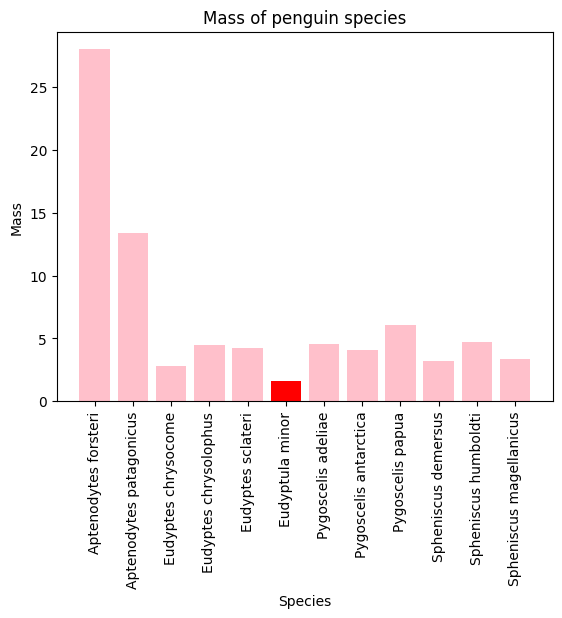

In [15]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species? 
## *Q2* What is the geographical range of this species?

min_mass = penguins_df.loc[penguins_df['mass'].idxmin(), 'species'] # Find the smallest species for Q1
bar_colors = ['red' if species == min_mass else 'pink' for species in penguins_df['species']] # Indicate it in different color

# Plot
plt.bar(penguins_df['species'], penguins_df['mass'], color=bar_colors)
plt.xlabel('Species') # X axis labels 
plt.ylabel('Mass') # Y axis labels 
plt.title('Mass of penguin species') # The plot title
plt.xticks(rotation=90)  # Rotate x-axis labels so they do not overlap
plt.show() # Showing the plot below

# According to the plot below the smallest penguin species is Eudyptula minor
# Geographical range is Australia and New zealand?

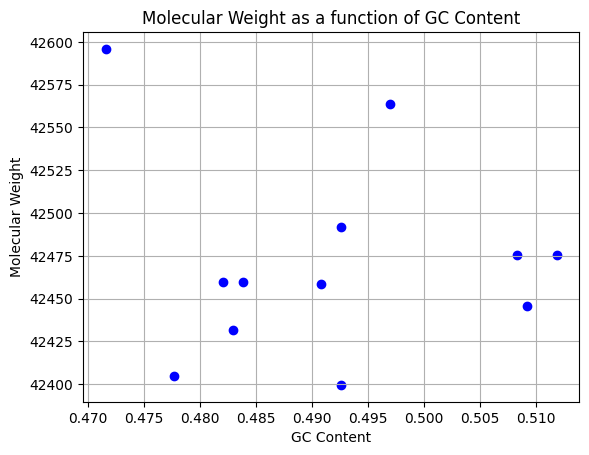

In [16]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

# Plot
plt.scatter(penguins_df['GC'], penguins_df['mw'], color='blue') # X and Y values + The color specification
plt.xlabel('GC Content') 
plt.ylabel('Molecular Weight')
plt.title('Molecular Weight as a function of GC Content')
plt.grid(True) # Have grids so you can see corresponding values easier
plt.show()

In [17]:
## 10 ##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"

penguins_df.to_csv(r'penguins_mass_cytb.csv', index=False)

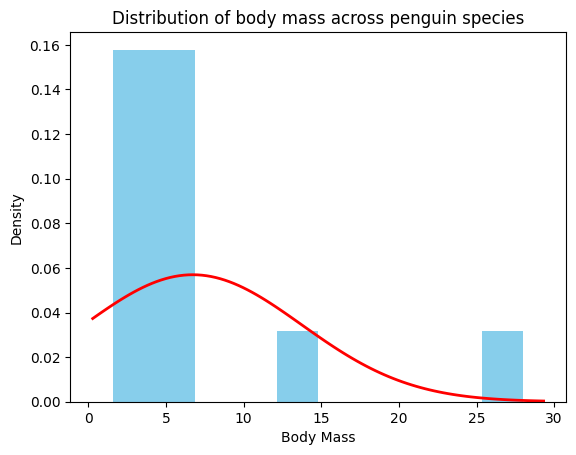

In [18]:
## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)


# We could look at the distribution of mass among species
def bodymass_dist(dataframe):
    # Fit a normal distribution to the data
    mu, sd = norm.fit(dataframe['mass'])
    # Plot the histogram as well
    plt.hist(dataframe['mass'], bins=10, density=True, color='skyblue')
    # Plot the normal curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sd)
    plt.plot(x, p, 'red', linewidth=2)
    plt.xlabel('Body Mass')
    plt.ylabel('Density')
    plt.title('Distribution of body mass across penguin species')
    plt.savefig('body_mass_distribution.png') # Save the image as PNG
    plt.show()

    
bodymass_dist(penguins_df)